In [28]:
from scipy import misc, signal
import numpy as np
import matplotlib.pyplot as plt
import cv2

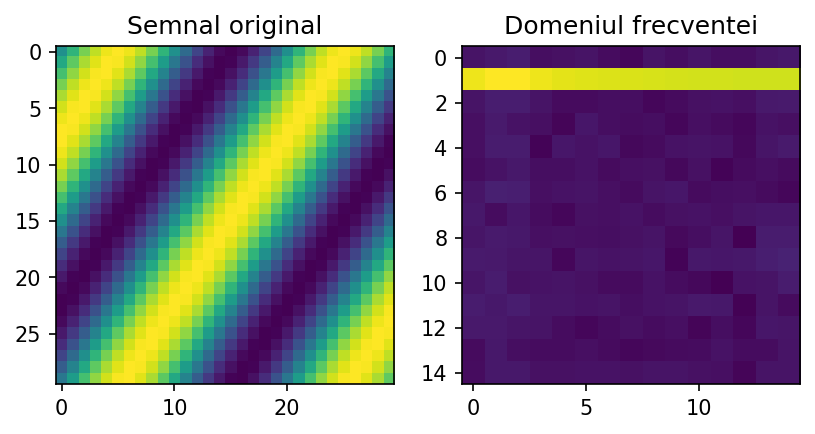

In [29]:
# ex 1

def fct(signal, size, step):
    # generare matrice de puncte
    n1, n2 = np.mgrid[0:size:step, 0:size:step]

    # esantionare semnal
    y = signal(n1, n2)
    
    # transformare fourier
    Y = np.fft.fft2(y)
    
    Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]

    epsilon = np.finfo(float).eps
    
    # transformare in scara logaritmica
    Y_scaled = 20 * np.log10(np.abs(Y) + epsilon)   # adunare cu epsilon pentru a evita log(0)   

    fig, ax = plt.subplots(1, 2, dpi=150)

    ax[0].set_title("Semnal original")
    ax[0].imshow(y)

    ax[1].set_title("Domeniul frecventei")
    ax[1].imshow(Y_scaled)

    plt.show()
    
# a)

def a(n1, n2):
    return np.sin(2 * np.pi * n1 + 3 * np.pi * n2)

fct(a, 1, 1/30)

Semnalul original are mai multe linii paralele

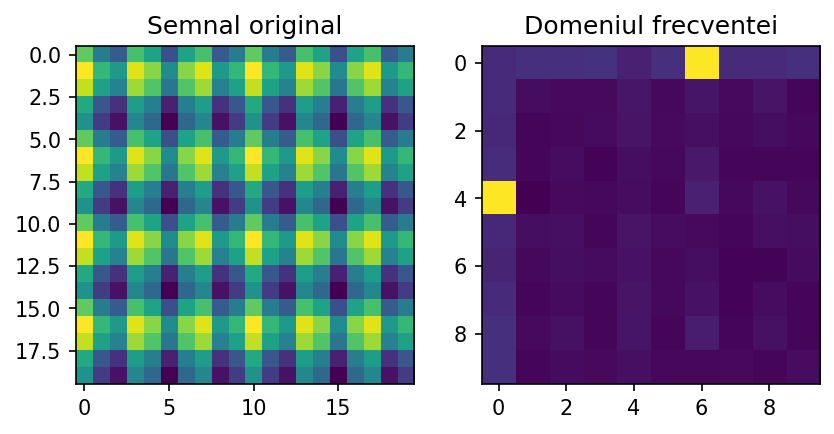

In [30]:
# b)
def b(n1, n2):
    return np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)

fct(b, 2, 1/10)

In domeniul frecventei observam ca semnalul este compus din 2 componente si ca pe orizontala se afla componenta de frecventa mai mare

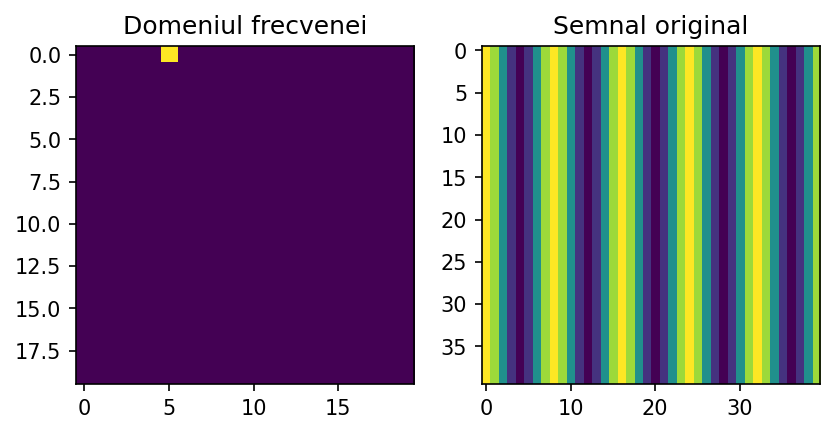

In [31]:
def fct2(f, size, step):
    # generare matrice de puncte
    N1, N2 = np.mgrid[0:size:step, 0:size:step]

    # esantionare semnal transformat
    Y = f(N1, N2)
    
    # transformare Fourier inversa
    y = np.fft.ifft2(Y).real
    

    fig, ax = plt.subplots(1, 2, dpi=150)

    Y = Y[:Y.shape[0]//2, :Y.shape[1]//2]
    
    ax[0].set_title("Domeniul frecvenei")
    ax[0].imshow(Y)
    
    ax[1].set_title("Semnal original")
    ax[1].imshow(y)
    

# c)

N = 40

def c(n1, n2):
    condition = (n1 == 0) & ((n2 == 5) | (n2 == N - 5))
    return np.where(condition, 1, 0)

fct2(c, N, 1)

In domeniul frecventei observam o singura componenta. Semnalul original este format din linii paralele cu axa Oy.

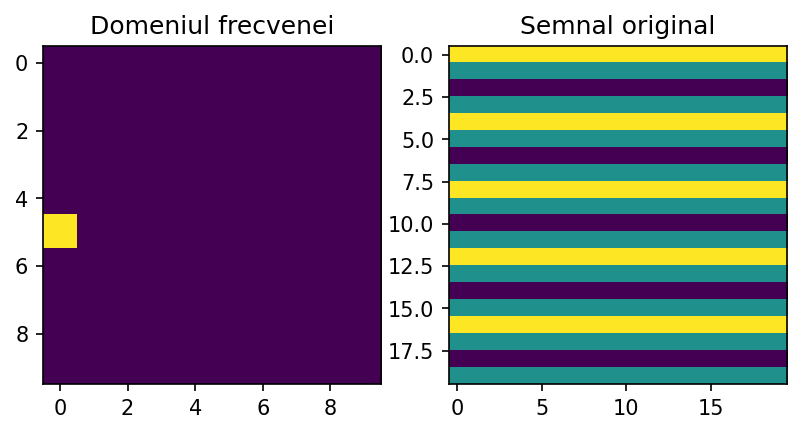

In [32]:
# d)

N = 20
def d(n1, n2):
    condition = ((n1 == 5) | (n1 == N - 5)) & (n2 == 0)
    return np.where(condition, 1, 0)

fct2(d, N, 1)

In domeniul frecventei observam o singura componenta. Semnalul original este format din linii paralele cu axa Ox.

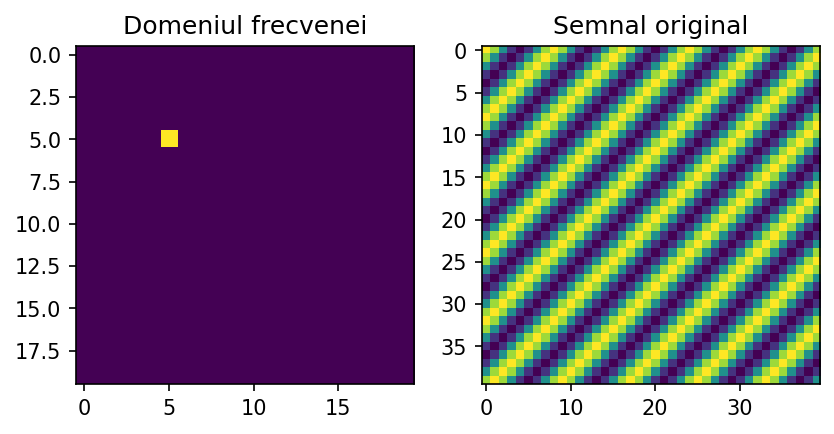

In [33]:
# e)

N = 40

def e(n1, n2):
    condition = ((n1 == 5) & (n2 == 5)) | ((n1 == (N - 5)) & (n2 == (N - 5)))
    return np.where(condition, 1, 0)

fct2(e, N, 1)

In domeniul frecventei semnalul este format dintr-o singura componenta de frecvente egale pe orizontala si verticala. Semnalul original este format din linii paralele.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\1133870038.py:47: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24172\1133870038.py:38: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  original = misc.face(gray=True)


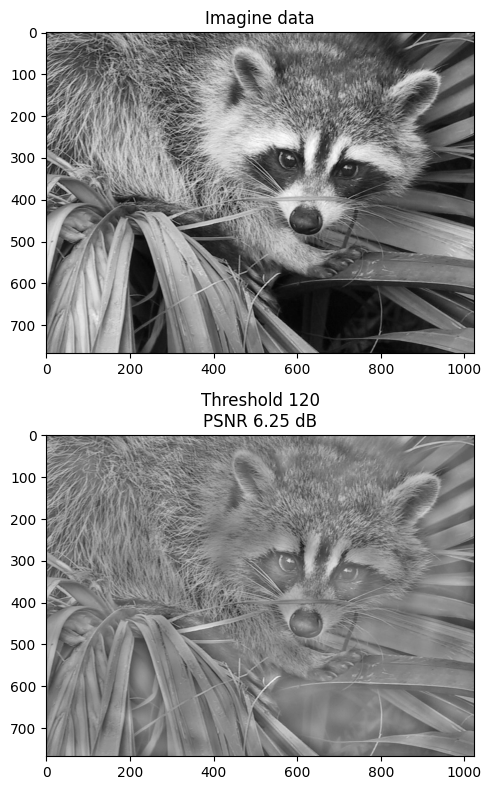

In [34]:
# ex 2

def psnr_fct(original, noisy):
    # peak signal-to-noise ratio pentru imaginea data

    squared_diffs = (original - noisy) ** 2
    mse = np.mean(squared_diffs)
    if mse == 0:
        # Daca semnalele sunt identice, nu există noise
        return np.inf
    
    # cel mai luminos pixel din imagine
    max_intensity = np.max(original)
    
    # raportul PSNR
    ratio = (max_intensity ** 2) / mse
    
    # Convertire in decibeli
    return 10 * np.log10(ratio)


def image_filter(original, threshold):
    # Filtrare frecvente mai mari de pragul dB din imaginea data
    
    # transformare in domeniul frecventei
    Y = np.fft.rfft2(original)
    
    # transformare in scara logaritmica
    Y_amp_db = 20 * np.log10(np.abs(Y))
    
    # atenuare frecvente de amplitudine mare
    Y[Y_amp_db > threshold] = 0

    # transformare inversa
    return np.fft.irfft2(Y)

def plot(ax, threshold):
    original = misc.face(gray=True)
    filtered = image_filter(original, threshold)
    psnr = psnr_fct(original, filtered)
    ax.imshow(filtered, cmap=plt.cm.gray)
    ax.set_title(f'Threshold {threshold}\nPSNR {psnr:.2f} dB')
    

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

X = misc.face(gray=True)
ax[0].imshow(X, cmap=plt.cm.gray)
ax[0].set_title('Imagine data')

plot(ax[1], 120)

plt.tight_layout()
plt.show()

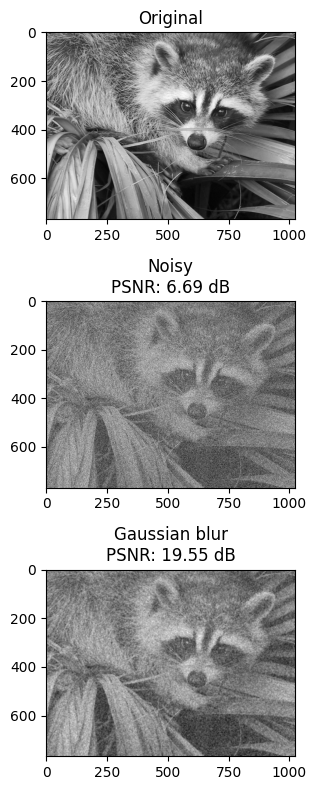

In [35]:
# ex 3

pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = (X + noise).astype('float32')

# Gaussian filtering
gaussian = cv2.GaussianBlur(X_noisy, (5,5), cv2.BORDER_DEFAULT)

fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].imshow(X, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(X_noisy, cmap=plt.cm.gray)
psnr = psnr_fct(X, X_noisy)
ax[1].set_title(f'Noisy\nPSNR: {psnr:.2f} dB')
ax[2].imshow(gaussian, cmap=plt.cm.gray)
psnr = psnr_fct(X, gaussian)
ax[2].set_title(f'Gaussian blur\nPSNR: {psnr:.2f} dB')
plt.tight_layout()
plt.show()